# 1) Ensure Dependencies have been Installed

In [80]:
!pip install scikit-learn matplotlib scipy

#2) Load dataset using scikit-learn
## For this project, I have used the California Housing Dataset.

In [81]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
# print(housing.DESCR) #This command prints the description of the dataset provided by sklearn


#3) Now, let's check the dimension of the feature matrix and target
##- I have also printed the feature names.


In [82]:
print("Feature Matrix Shape:", housing.data.shape) #(n_samples, nfeatures_)
print("Target Shape:", housing.target.shape) #n_samples
print("Features", housing.feature_names)

Feature Matrix Shape: (20640, 8)
Target Shape: (20640,)
Features ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


# 4) Randomly shuffle the data to avoid any bias in the dataset

-The target vector has shape `(20640,) `and the feature matrix has shape `(20640, 8).` To stack them, I need to reshape my target vector to `(20640,1)`


In [83]:
import numpy as np

target = np.reshape(housing.target, (20640,1))
#print(target.shape)
combined_data = np.hstack((housing.data, target)) #combining dataset for random shuffling
#print(combined_data.shape)
shuffled_data = np.random.permutation(combined_data) #randomly shuffles the data
#print(shuffled_data.shape)

#4) Split the dataset into training and test sets.
- I have done the split manually.
- The train to split ratio is 80:20


In [84]:
X_train = shuffled_data[:16512, :-1] #(16512, 8)
Y_train = shuffled_data[:16512, -1] #(16512,)
# print(X_train.shape)
# print(Y_train.shape)
X_test = shuffled_data[16512:, :-1] #(4128,8)
Y_test = shuffled_data[16512:, -1] #(4128,)
# print(X_test.shape)
# print(Y_test.shape)

#5) Visualize the distribution of training and test data using `Matplotlib`

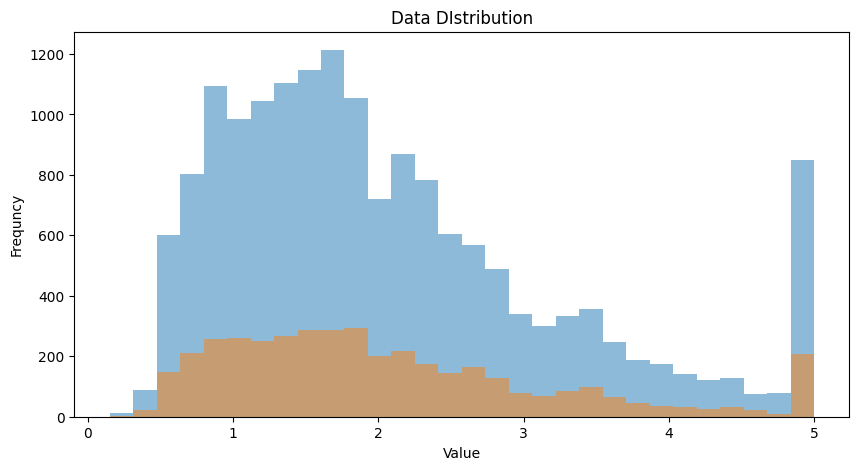

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
plt.hist(Y_train, bins = 30, alpha = 0.5)
plt.subplot(1,1,1)
plt.hist(Y_test, bins = 30, alpha = 0.5)
plt.xlabel("Value")
plt.ylabel("Frequncy")
plt.title("Data DIstribution")


plt.show()


The training and test datasets appear to be similarly distributed, which is desired.

#6) Feature Normalization
##-Since the features have very different scales, I am going to normalize them.
##-I have used min-max scaling.



In [86]:
#Calculate min and max for each feature
X_min = np.min(X_train, axis=0)
X_max = np.max(X_train, axis=0)

X_train_normalized = (X_train - X_min) / (X_max - X_min)
X_test_normalized = (X_test - X_min)/ (X_max - X_min)

#print(X_train_normalized, X_test_normalized)

#7) Verify Normalization

In [87]:
print("Scaled Training Set Range:")
print("Min:", np.min(X_train_normalized, axis=0))  #Should be 0
print("Max:", np.max(X_train_normalized, axis=0)) #Should be 1

Scaled Training Set Range:
Min: [0. 0. 0. 0. 0. 0. 0. 0.]
Max: [1. 1. 1. 1. 1. 1. 1. 1.]


#8) Implement Linear Regression

In [88]:
#Data Preprocessing: Adds a bias (column of ones) to the feature matrix
b = np.ones((16512,1))
b1 = np.ones((4128,1))

X_train_final = np.hstack((X_train_normalized, b))
X_test_final = np.hstack((X_test_normalized, b1))
# print(X_test_final.shape)
# print(X_train_final.shape)

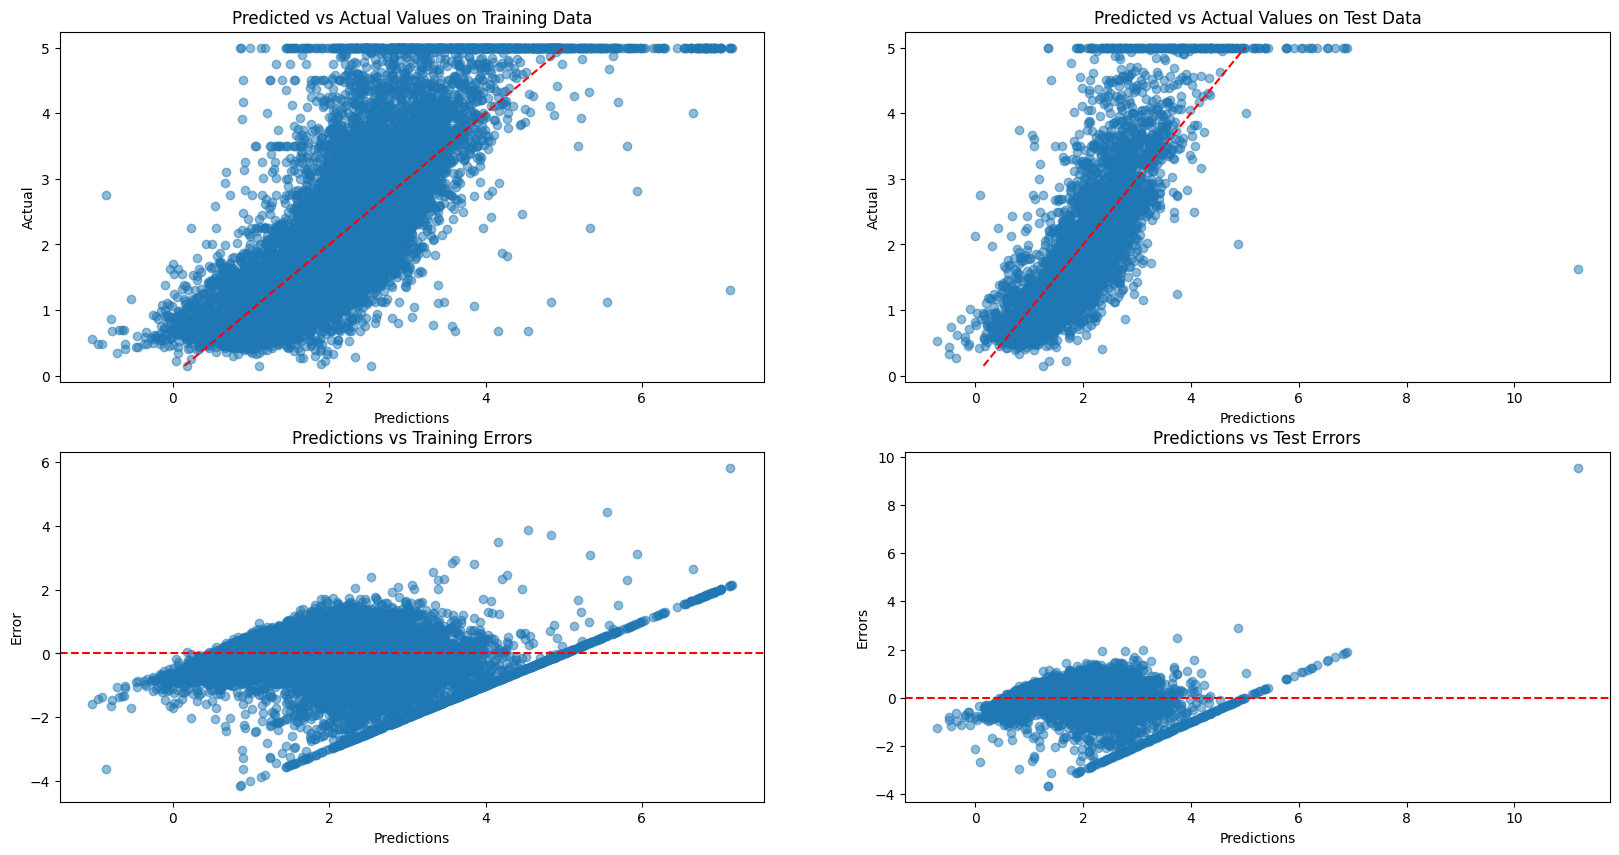

In [101]:
W = np.dot(np.linalg.inv(np.dot(X_train_final.T, X_train_final)), np.dot(X_train_final.T, Y_train))
pred = np.dot(X_train_final, W) #predictions on training
h = np.dot(X_test_final, W) #predictions on test

error_train = pred - Y_train
error_test = h - Y_test

plt.figure(figsize =(20,10))

plt.subplot(2,2,1)
plt.scatter(pred, Y_train, alpha = 0.5)
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_test)], color='red', linestyle='--') #Line of Best Fit
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.title("Predicted vs Actual Values on Training Data")

plt.subplot(2,2,2)
plt.scatter(h, Y_test, alpha = 0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.title("Predicted vs Actual Values on Test Data")

plt.subplot(2,2,3)
plt.scatter(pred, error_train, alpha = 0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predictions")
plt.ylabel("Error")
plt.title("Predictions vs Training Errors")

plt.subplot(2,2,4)
plt.scatter(h, error_test, alpha = 0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predictions")
plt.ylabel("Errors")
plt.title("Predictions vs Test Errors")

plt.show()

# print(Y_train.shape)


#11) Residual Analysis:
##In this section, I check the assumptions of linear regression- The errors should be normally distributed.
### To verify, I have plotted the errors on both training and test sets as a histogram as well as a QQ Plot.

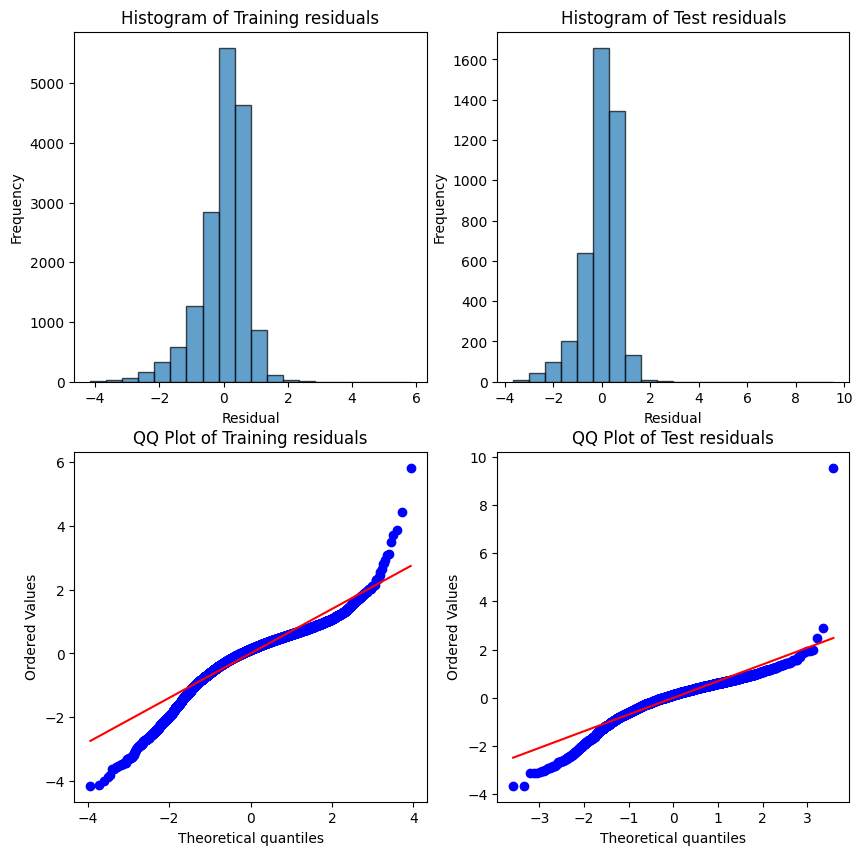

In [90]:
import scipy.stats as stats

plt.figure(figsize =(10,10))
plt.subplot(2, 2, 1)
plt.hist(error_train, bins=20, alpha = 0.7, edgecolor = 'k')
plt.title("Histogram of Training residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
plt.hist(error_test, bins=20, alpha = 0.7, edgecolor = 'k')
plt.title("Histogram of Test residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")

plt.subplot(2, 2, 3)
stats.probplot(error_train, dist = "norm", plot=plt)
plt.title("QQ Plot of Training residuals")

plt.subplot(2, 2, 4)
stats.probplot(error_test, dist = "norm", plot=plt)
plt.title("QQ Plot of Test residuals")


plt.show()


#10) Evaluate Performance


In [92]:
import math

print("Mean of Training Residuals:", np.mean(error_train))
print("Mean of Test Residuals:", np.mean(error_test))
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

MAE_train = np.mean((abs(pred - Y_train)))
MAE_test = np.mean((abs(h - Y_test)))
print("Mean Absolute Error:")
print("MAE of Training Data:", MAE_train)
print("MAE of Test Data:", MAE_test)
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

MSE_train = np.mean((pred - Y_train)**2)
MSE_test = np.mean((h - Y_test)**2)

print("Mean Squared Error:")
print("MSE of Training Data:", MSE_train)
print("MSE of Test Data:", MSE_test)
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

RMSE_train = math.sqrt(MSE_train)
RMSE_test = math.sqrt(MSE_test)

print("Root Mean Squared Error:")
print("MSE of Training Data:", RMSE_train)
print("MSE of Test Data:", RMSE_test)
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")



Mean of Training Residuals: -7.740631994122246e-14
Mean of Test Residuals: -0.004346237707529308
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Mean Absolute Error:
MAE of Training Data: 0.5312453773335538
MAE of Test Data: 0.5273634593355598
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Mean Squared Error:
MSE of Training Data: 0.5247874123177202
MSE of Test Data: 0.5274152057506741
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Root Mean Squared Error:
MSE of Training Data: 0.7244221230178716
MSE of Test Data: 0.7262335752019966
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
